In [11]:
import pandas as pd
import re
from PIL import Image

## Import word processing libraries
import nltk
from nltk.corpus import stopwords
import stylecloud


# pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
## Read Sample Data
df = pd.read_csv("sample_data_bq.csv")
df.head()

,id,reddit_url,title,author,author_flair,text_body,flair_category,submission_datetime,comment_id,comment_author,comment_author_flair,comment_text_body,comment_parent_id,comment_link_id,comment_datetime,direct_comment_flag,rank_comment_order,num_images,num_videos,string_submission_images,string_submission_videos
0,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif3w30,darksieth99,NaN,The process is the same as other carriers. You...,t3_wcwlg1,t3_wcwlg1,2022-07-31T19:40:56Z,1,1.0,0,0,NaN,NaN
1,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif478z,lovdagame,NaN,If I sign the paper they'll leave the package ...,t1_iif3w30,t3_wcwlg1,2022-07-31T19:43:11Z,0,2.0,0,0,NaN,NaN
2,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif4ljy,lovdagame,NaN,And I'm mad at fedex because I put in a lot of...,t1_iif3w30,t3_wcwlg1,2022-07-31T19:46:04Z,0,3.0,0,0,NaN,NaN
3,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif5ddd,darksieth99,NaN,"Correct, just sign it and you should be good ...",t1_iif4ljy,t3_wcwlg1,2022-07-31T19:51:39Z,0,4.0,0,0,NaN,NaN
4,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif5opk,lovdagame,NaN,See I tried to do that when it would come they...,t1_iif5ddd,t3_wcwlg1,2022-07-31T19:53:56Z,0,5.0,0,0,NaN,NaN


In [3]:
print("Shape: ", df.shape)
print("Submission: ", len(df["id"].unique()))
print("Num Comments: ", len(df["comment_id"].unique()) - 1) # minus 1 for the null commentid

Shape:  (500, 21)
Submission:  111
Num Comments:  480


In [4]:
## This is in UTC Time
print("First Datetime: ", \
min(min(df["submission_datetime"]), min(df[~df["comment_datetime"].isnull()]["comment_datetime"])) )

print("Last Datetime: ", \
max(max(df["submission_datetime"]), max(df[~df["comment_datetime"].isnull()]["comment_datetime"])) )

First Datetime:  2022-07-31T19:21:45Z
Last Datetime:  2022-08-07T23:45:15Z


### Create Word Cloud

In [5]:
def clean_text(x):
    if x is None or pd.isnull(x):
        return []
    
    x = x.lower() #lower sentence
    no_punc = re.sub(r'\s+', ' ', x)  #remove multiple spaces
    no_punc = re.sub(r'(fedex|fed ex)', 'fedex', no_punc)
    no_punc = no_punc.split(' ')  #splits by space
        
    ## strips all punctuation and emojis: re.sub(r'[^\w\s]','', x)
    no_punc = [re.sub(r'[^\w\s]','',word) for word in no_punc if word not in stopwords.words('english')] #removes stopwords
    no_punc = [word for word in no_punc if word not in ["im", "ive"]] #removes stopwords
    
    no_punc = [elem for elem in no_punc if len(elem) > 1] #remove single characters
    return no_punc

In [6]:
df["title_clean"] = df["title"].apply(lambda x: clean_text(x))
df["text_body_clean"] = df["text_body"].apply(lambda x: clean_text(x))
df["comment_text_body_clean"] = df["comment_text_body"].apply(lambda x: clean_text(x))

In [7]:
df.head()

,id,reddit_url,title,author,author_flair,text_body,flair_category,submission_datetime,comment_id,comment_author,comment_author_flair,comment_text_body,comment_parent_id,comment_link_id,comment_datetime,direct_comment_flag,rank_comment_order,num_images,num_videos,string_submission_images,string_submission_videos,title_clean,text_body_clean,comment_text_body_clean
0,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif3w30,darksieth99,NaN,The process is the same as other carriers. You...,t3_wcwlg1,t3_wcwlg1,2022-07-31T19:40:56Z,1,1.0,0,0,NaN,NaN,"[wits, end]","[called, support, 12, times, supposed, deliver...","[process, carriers, family, drivers, least, dr..."
1,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif478z,lovdagame,NaN,If I sign the paper they'll leave the package ...,t1_iif3w30,t3_wcwlg1,2022-07-31T19:43:11Z,0,2.0,0,0,NaN,NaN,"[wits, end]","[called, support, 12, times, supposed, deliver...","[sign, paper, theyll, leave, package, there]"
2,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif4ljy,lovdagame,NaN,And I'm mad at fedex because I put in a lot of...,t1_iif3w30,t3_wcwlg1,2022-07-31T19:46:04Z,0,3.0,0,0,NaN,NaN,"[wits, end]","[called, support, 12, times, supposed, deliver...","[mad, fedex, put, lot, effort, try, find, info..."
3,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif5ddd,darksieth99,NaN,"Correct, just sign it and you should be good ...",t1_iif4ljy,t3_wcwlg1,2022-07-31T19:51:39Z,0,4.0,0,0,NaN,NaN,"[wits, end]","[called, support, 12, times, supposed, deliver...","[correct, sign, good, also, never, get, driver..."
4,t3_wcwlg1,https://www.reddit.com/r/FedEx/comments/wcwlg1...,I am at my wit's end,lovdagame,NaN,I've called support over 12 times. It was supp...,Home Del. Shipment,2022-07-31T19:21:45Z,t1_iif5opk,lovdagame,NaN,See I tried to do that when it would come they...,t1_iif5ddd,t3_wcwlg1,2022-07-31T19:53:56Z,0,5.0,0,0,NaN,NaN,"[wits, end]","[called, support, 12, times, supposed, deliver...","[see, tried, would, come, said, works, pay, sh..."


In [8]:
## Separate submission and comments
submissions = df[["id","reddit_url","title","author","author_flair","text_body","flair_category","submission_datetime"]]
submissions = submissions.drop_duplicates()

submissions["title_clean"] = submissions["title"].apply(lambda x: clean_text(x))
submissions["text_body_clean"] = submissions["text_body"].apply(lambda x: clean_text(x))

comments = df[~df["comment_datetime"].isnull()]
comments = comments[["comment_id","comment_author","comment_author_flair","comment_text_body","comment_parent_id",
               "comment_link_id","comment_datetime", "comment_text_body_clean"]]

In [9]:
print("submissions: ", submissions.shape)
print("comments shape: ", comments.shape)

submissions:  (111, 10)
comments shape:  (480, 8)


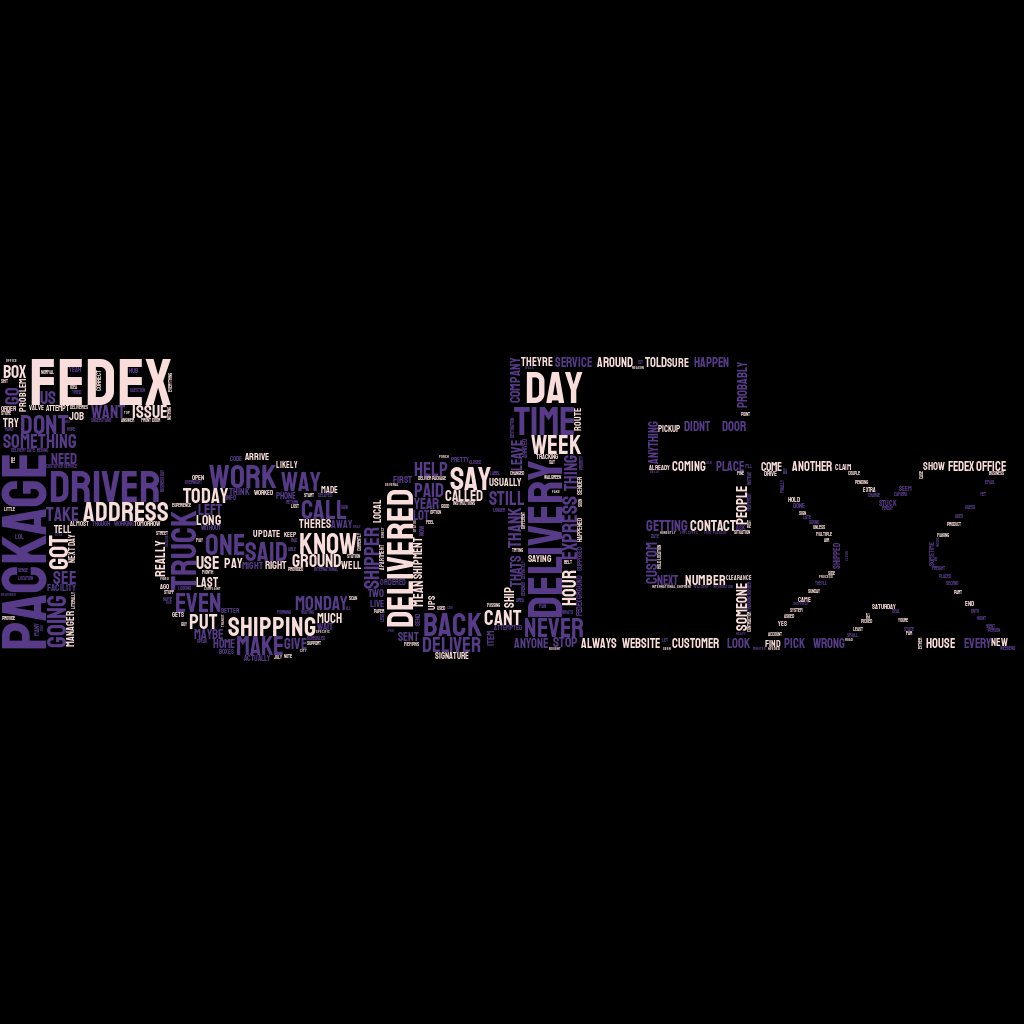

In [25]:
## Most Popular word in All
temp = submissions.copy()
temp['cleaned_text_title'] = temp['title_clean'].apply(lambda x: ' '.join(x))
temp['cleaned_text_body'] = temp['text_body_clean'].apply(lambda x: ' '.join(x))

temp2 = comments.copy()
temp2['cleaned_text_comments'] = temp2['comment_text_body_clean'].apply(lambda x: ' '.join(x))

long_string_title = ','.join(list(temp['cleaned_text_title'].values))
long_string_body = ','.join(list(temp['cleaned_text_body'].values))
long_string_comments = ','.join(list(temp2['cleaned_text_comments'].values))

long_string = long_string_title + "," + long_string_body + "," + long_string_comments

del temp, temp2;

## Generate word cloud
stylecloud.gen_stylecloud(text=long_string, icon_name='fab fa-fedex', size=1024, max_words=500, 
                          palette='cartocolors.sequential.PurpOr_2', background_color="black", 
                          stopwords = False,
                          output_name='fedex-reddit-wordcloud.png')

Image.open('fedex-reddit-wordcloud.png')